In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_hdf(r"C:\Users\vjj14\Desktop\DeepLabCut\frontslowmo-vj-2019-06-05\videos\1080pDeepCut_resnet50_frontslowmoJun5shuffle1_28000.h5")
df.head()

scorer    DeepCut_resnet50_frontslowmoJun5shuffle1_28000               \
bodyparts                                       LeftHand                
coords                                                 x            y   
0                                            1390.192226   863.416119   
1                                            1342.686916  1022.539194   
2                                            1378.603021   839.200051   
3                                             717.164830   528.112061   
4                                            1342.347172  1021.188973   

scorer                                                                \
bodyparts              RightHand                                Nose   
coords    likelihood           x           y likelihood            x   
0           0.002139  655.710966  671.552855   0.032500   858.313563   
1           0.002778  655.604768  672.732703   0.014964   858.805179   
2           0.047292  655.568096  671.990225   0.008627  1376.614242   
3           0.003874  713.522496  529.766140   0.013523   712.549768   
4           0.002228  772.206697  391.288171   0.004997   776.260397   

scorer                                                               
bodyparts                             Pellet                         
coords              y likelihood           x           y likelihood  
0          502.588775   0.008193  780.110655  385.511159   0.005372  
1          503.061315   0.009881  780.056775  385.812507   0.004218  
2          838.820607   0.023861  779.368590  384.613344   0.005453  
3          530.312717   0.013139  779.937964  384.928218   0.008758  
4          387.588437   0.016647  781.683410  385.065720   0.030118

In [3]:
#remove extra level "scorer"
df.columns = df.columns.droplevel()

In [4]:
df.describe()

bodyparts      LeftHand                                 RightHand  \
coords                x             y    likelihood             x   
count      15560.000000  15560.000000  15560.000000  15560.000000   
mean         977.849332    745.579152      0.601358    899.559478   
std          142.754075    131.899256      0.369681    137.444145   
min           -6.669171      5.883271      0.000066     -2.029186   
25%          923.768691    675.137560      0.208584    855.911121   
50%         1001.897225    792.747423      0.732366    909.348266   
75%         1061.138972    822.820469      0.956129    940.660178   
max         1585.025511   1084.913321      0.997853   1597.695641   

bodyparts                                      Nose                \
coords                y    likelihood             x             y   
count      15560.000000  15560.000000  15560.000000  15560.000000   
mean         760.008314      0.384771    910.665190    674.569907   
std          157.880620      0.373030    127.302204    182.134259   
min           -2.724167      0.000014    293.686061     -2.433039   
25%          667.988975      0.040507    907.940909    612.419436   
50%          796.819660      0.190496    918.667319    722.062363   
75%          869.177743      0.803769    927.161590    793.623350   
max         1087.950750      0.996967   1918.023721   1085.842639   

bodyparts                      Pellet                              
coords       likelihood             x             y    likelihood  
count      15560.000000  15560.000000  15560.000000  15560.000000  
mean           0.707797    922.139248    802.436978      0.306293  
std            0.375586    121.030313    167.653148      0.419701  
min            0.000048     -3.643595     -6.373269      0.000009  
25%            0.384133    911.097833    670.841060      0.021924  
50%            0.936236    935.294075    817.678463      0.042223  
75%            0.976448    944.802522    938.010356      0.951677  
max            0.997645   1605.171667   1090.683265      0.998888

In [5]:
lkh=0.1
above_lkh = df[(df['LeftHand', "likelihood"] >= lkh) | (df['RightHand', "likelihood"] >= lkh)  | (df['Nose', "likelihood"] >= lkh) | (df['Pellet', "likelihood"] >= lkh)]

In [6]:
above_lkh.describe()

bodyparts      LeftHand                                 RightHand  \
coords                x             y    likelihood             x   
count      15225.000000  15225.000000  15225.000000  15225.000000   
mean         977.442098    746.548391      0.613979    899.599726   
std          138.068604    129.232403      0.363668    133.379888   
min          353.025344      5.883271      0.000697    322.612327   
25%          924.016880    676.319036      0.242368    857.952200   
50%         1001.612045    793.343071      0.753253    909.394549   
75%         1060.571731    822.844498      0.957563    940.398318   
max         1585.025511   1082.478232      0.997853   1581.410114   

bodyparts                                      Nose                \
coords                y    likelihood             x             y   
count      15225.000000  15225.000000  15225.000000  15225.000000   
mean         761.680031      0.392838    910.465518    675.957609   
std          156.146550      0.373072    122.777225    180.120204   
min            4.583948      0.000708    295.135456      2.624315   
25%          670.104237      0.043378    908.613201    613.587604   
50%          797.455431      0.212792    918.743227    723.100480   
75%          869.321192      0.810159    927.036932    793.627912   
max         1084.515259      0.996967   1596.871665   1081.786046   

bodyparts                      Pellet                              
coords       likelihood             x             y    likelihood  
count      15225.000000  15225.000000  15225.000000  15225.000000  
mean           0.723083    920.990282    805.550405      0.312850  
std            0.365116    114.217663    163.687619      0.421930  
min            0.000886    331.032217     -0.396283      0.000413  
25%            0.491412    911.439919    677.091079      0.022736  
50%            0.939742    935.262731    823.167530      0.043504  
75%            0.976842    944.621758    938.200944      0.956033  
max            0.997645   1584.257493   1086.249453      0.998888

In [7]:
import matplotlib as plt


In [8]:
above_lkh[(df['Nose', "likelihood"] >= 0.1)]['Nose'].plot(kind='scatter', x='x', y='y')
df['Nose'].head()
above_lkh['Nose'].plot.line()

C:\Users\vjj14\.conda\envs\dlc-windowsGPU\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [9]:
df.head()

bodyparts     LeftHand                           RightHand              \
coords               x            y likelihood           x           y   
0          1390.192226   863.416119   0.002139  655.710966  671.552855   
1          1342.686916  1022.539194   0.002778  655.604768  672.732703   
2          1378.603021   839.200051   0.047292  655.568096  671.990225   
3           717.164830   528.112061   0.003874  713.522496  529.766140   
4          1342.347172  1021.188973   0.002228  772.206697  391.288171   

bodyparts                    Nose                             Pellet  \
coords    likelihood            x           y likelihood           x   
0           0.032500   858.313563  502.588775   0.008193  780.110655   
1           0.014964   858.805179  503.061315   0.009881  780.056775   
2           0.008627  1376.614242  838.820607   0.023861  779.368590   
3           0.013523   712.549768  530.312717   0.013139  779.937964   
4           0.004997   776.260397  387.588437   0.016647  781.683410   

bodyparts                         
coords              y likelihood  
0          385.511159   0.005372  
1          385.812507   0.004218  
2          384.613344   0.005453  
3          384.928218   0.008758  
4          385.065720   0.030118

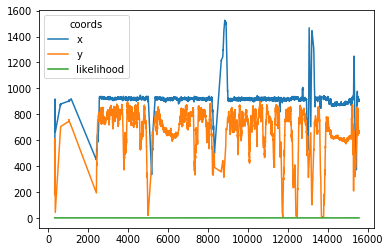

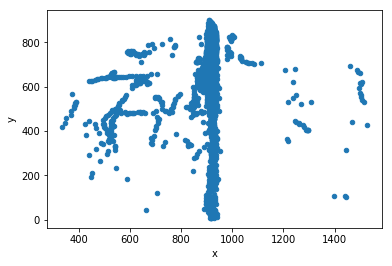

In [10]:
variablename = 0.8
above_lkh_nose = above_lkh[(above_lkh['Nose', 'likelihood'] >= variablename)]['Nose']
above_lkh_nose.plot()
above_lkh_nose.plot(kind='scatter', x='x', y='y')

In [11]:
print(above_lkh_nose.describe())
nose_diff= above_lkh_nose.diff()
nose_diff.describe()

coords             x             y    likelihood
count   10288.000000  10288.000000  10288.000000
mean      908.911847    699.993643      0.952286
std        63.579013    133.992409      0.043337
min       334.469009      7.905138      0.800098
25%       911.657064    632.673547      0.937604
50%       918.253522    729.451098      0.968311
75%       923.832225    799.441160      0.982928
max      1525.848711    898.827847      0.997645


coords,x,y,likelihood
count,10287.000000,10287.000000,10287.000000
mean,0.030858,0.047538,0.000005
std,21.501668,19.964920,0.049270
min,-762.730662,-551.037407,-0.183404
25%,-2.970357,-5.943775,-0.019500
50%,-0.028691,-0.179610,0.000170
75%,2.862602,5.436313,0.019998
max,925.877482,628.866126,0.181662


In [12]:
print(list(nose_diff.columns))
test = nose_diff.copy()
for i in range(len(nose_diff.columns)):
    x = nose_diff.columns[i]
    test = test.loc[(test[x] < 50) & (test[x] > -50)]
test.describe()

['x', 'y', 'likelihood']


coords,x,y,likelihood
count,10159.000000,10159.000000,10159.000000
mean,-0.067206,-0.139637,-0.000016
std,5.322679,12.705114,0.049041
min,-48.878414,-49.734086,-0.183404
25%,-2.927772,-5.858834,-0.019375
50%,-0.033396,-0.192833,0.000168
75%,2.819060,5.276144,0.019755
max,43.036841,49.725568,0.181662


In [13]:
x = test.unstack(0)
y = list(test.index)
print(y[-1])
nose_diff.describe()

15555


coords,x,y,likelihood
count,10287.000000,10287.000000,10287.000000
mean,0.030858,0.047538,0.000005
std,21.501668,19.964920,0.049270
min,-762.730662,-551.037407,-0.183404
25%,-2.970357,-5.943775,-0.019500
50%,-0.028691,-0.179610,0.000170
75%,2.862602,5.436313,0.019998
max,925.877482,628.866126,0.181662


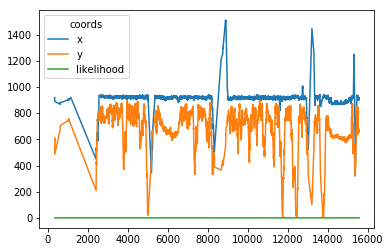

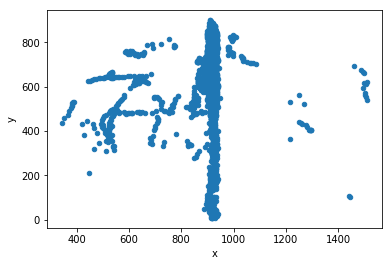

In [38]:
diditwork = df.iloc[y]
diditwork_nose = diditwork[diditwork['Nose', 'likelihood'] >= variablename]['Nose']
diditwork_nose.plot()
diditwork_nose.plot(kind='scatter', x='x', y='y')

C:\Users\vjj14\.conda\envs\dlc-windowsGPU\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


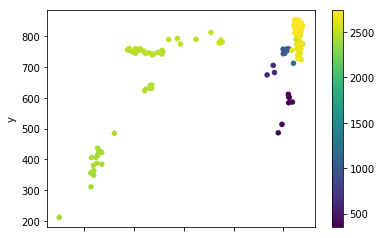

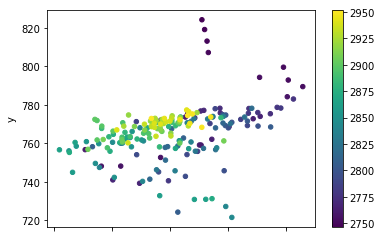

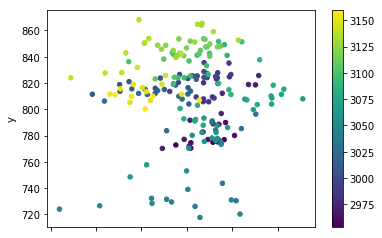

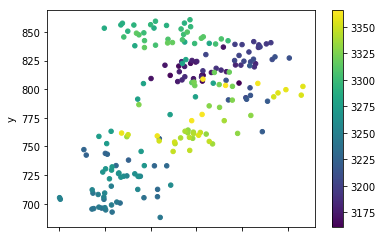

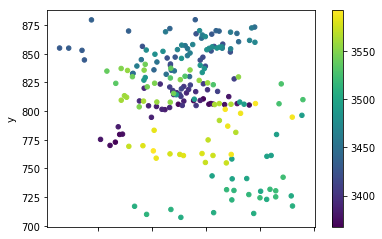

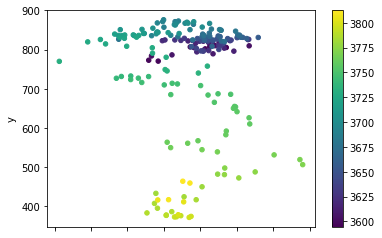

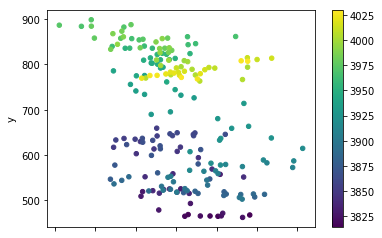

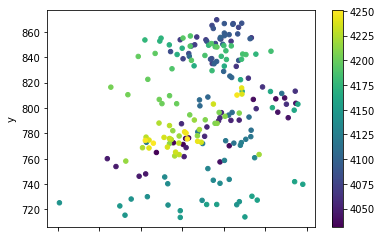

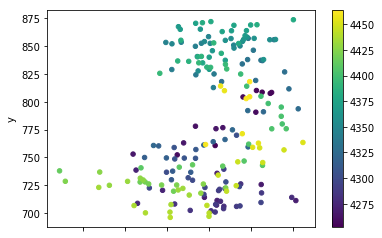

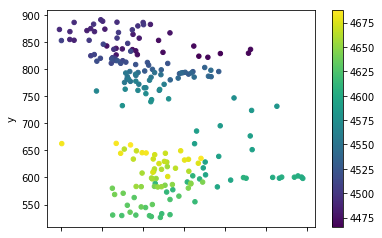

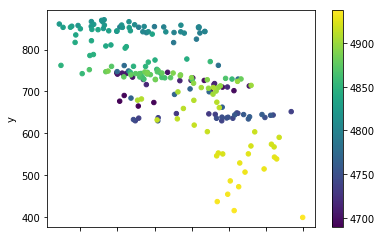

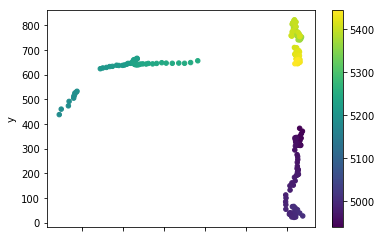

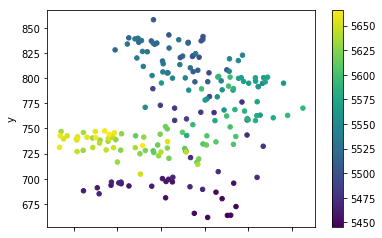

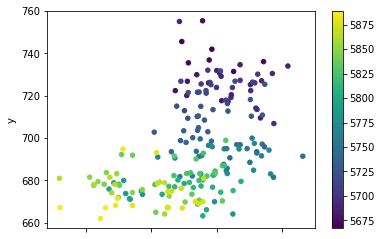

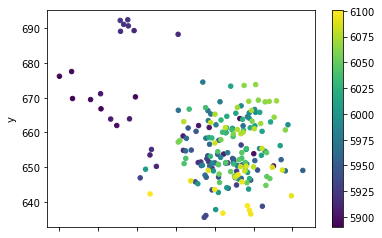

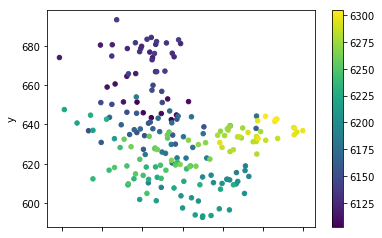

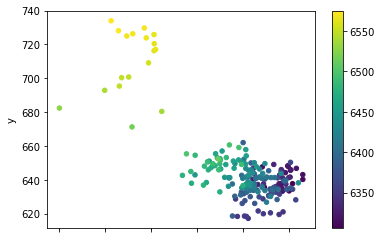

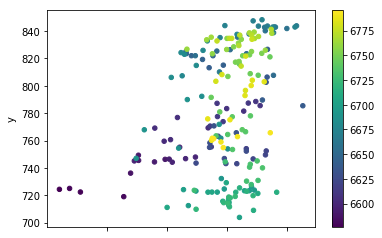

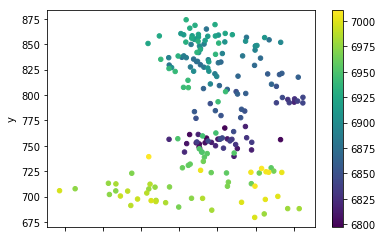

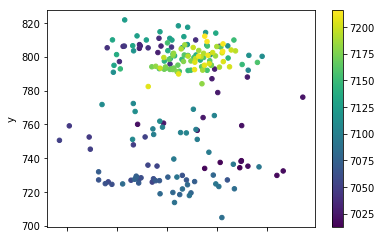

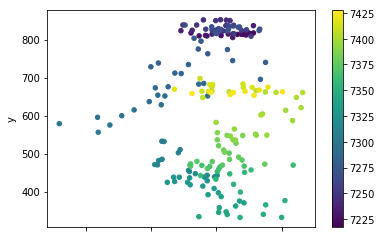

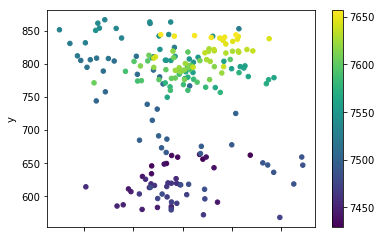

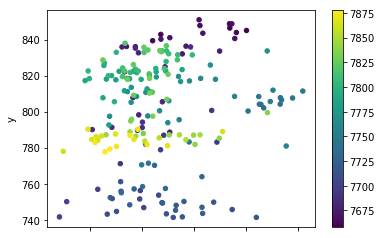

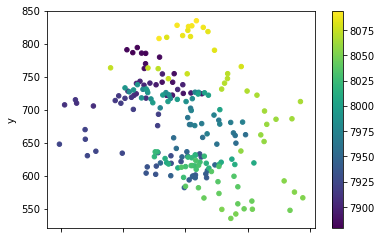

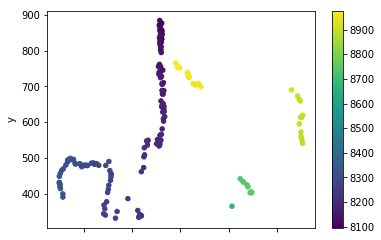

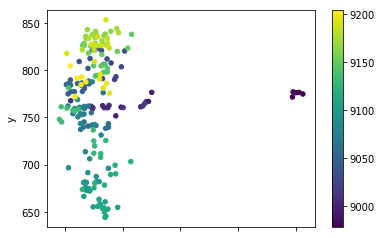

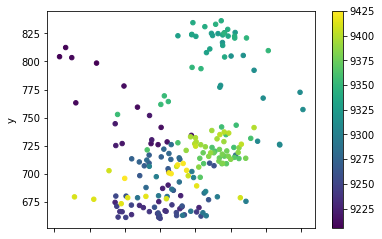

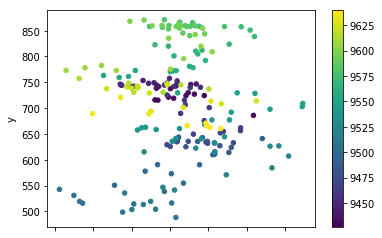

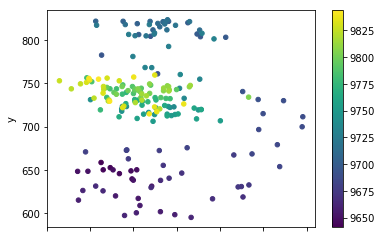

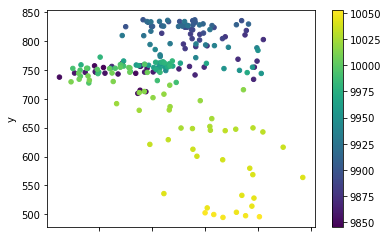

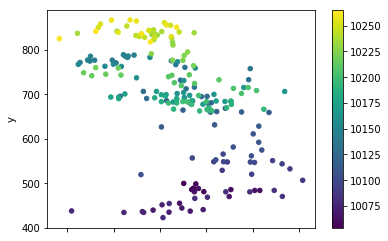

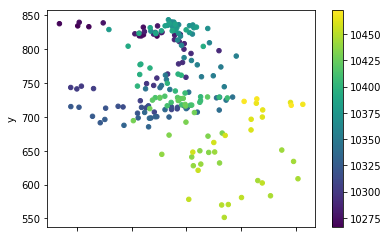

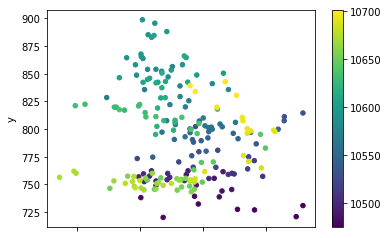

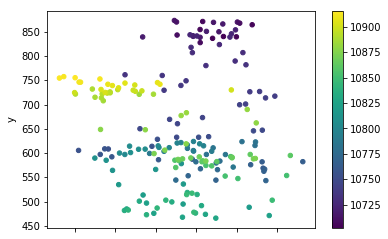

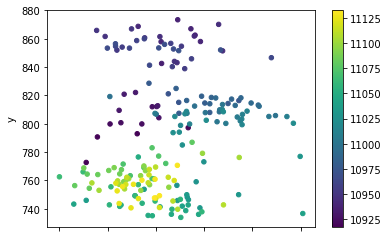

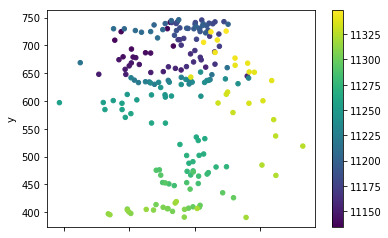

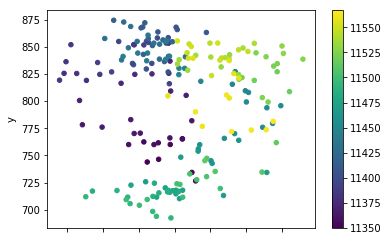

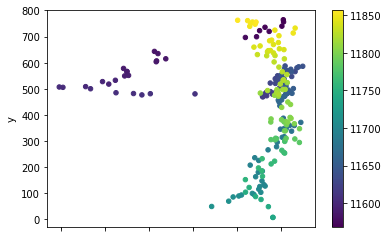

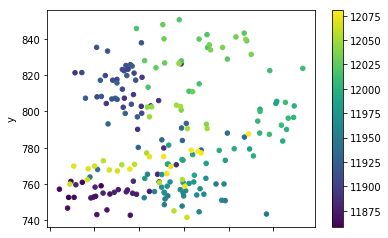

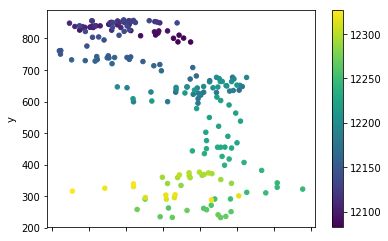

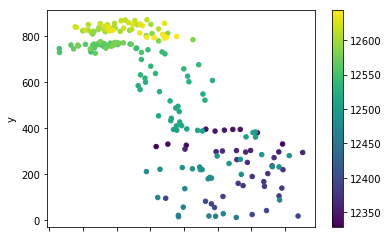

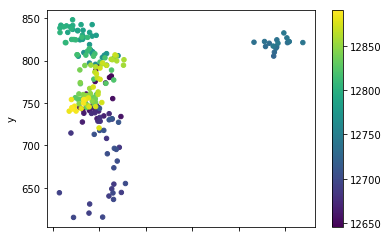

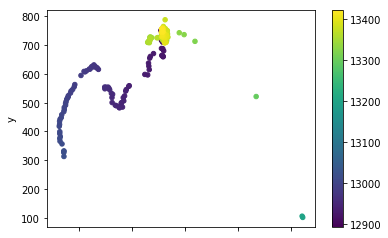

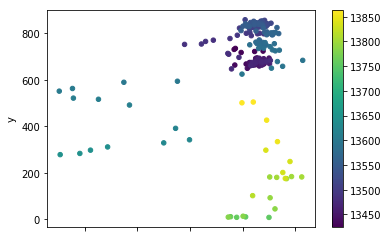

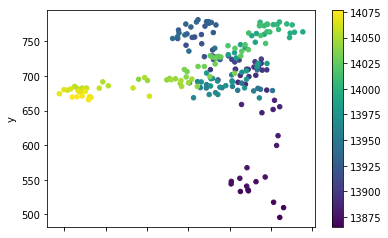

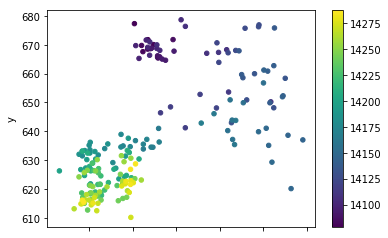

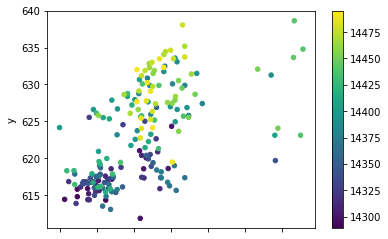

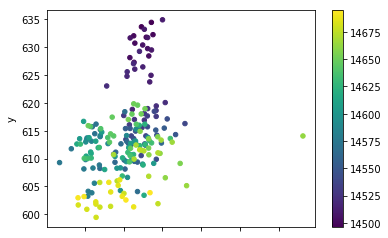

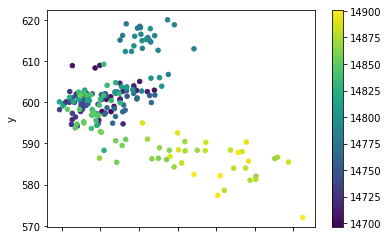

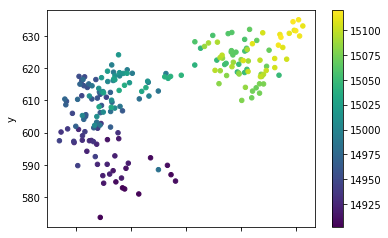

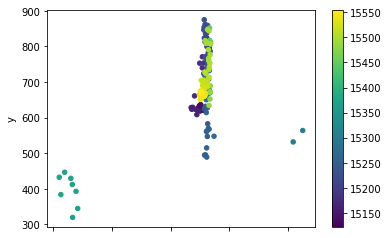

In [39]:
step=200
for i in range(0, len(diditwork_nose.index), step):
    diditwork_nose[i:i+step].plot(kind='scatter', x='x', y='y', c=diditwork_nose.index[i:i+step], colormap='viridis')    

In [48]:
def frames_to_time(frame):
    total_seconds = (frame/15562)*518
    return (total_seconds//60, total_seconds%60)
print(frames_to_time(13400))
print(frames_to_time(12900))
#5000 to 54000
#12900 to 13400

(7.0, 26.035213982778544)
(7.0, 9.392108983421167)


In [49]:
csv = pd.read_csv(r"C:\Users\vjj14\Desktop\DeepLabCut\frontslowmo-vj-2019-06-05\videos\1080pDeepCut_resnet50_frontslowmoJun5shuffle1_28000.csv")
csv.head()


,scorer,DeepCut_resnet50_frontslowmoJun5shuffle1_28000,DeepCut_resnet50_frontslowmoJun5shuffle1_28000.1,DeepCut_resnet50_frontslowmoJun5shuffle1_28000.2,DeepCut_resnet50_frontslowmoJun5shuffle1_28000.3,DeepCut_resnet50_frontslowmoJun5shuffle1_28000.4,DeepCut_resnet50_frontslowmoJun5shuffle1_28000.5,DeepCut_resnet50_frontslowmoJun5shuffle1_28000.6,DeepCut_resnet50_frontslowmoJun5shuffle1_28000.7,DeepCut_resnet50_frontslowmoJun5shuffle1_28000.8,DeepCut_resnet50_frontslowmoJun5shuffle1_28000.9,DeepCut_resnet50_frontslowmoJun5shuffle1_28000.10,DeepCut_resnet50_frontslowmoJun5shuffle1_28000.11
0,bodyparts,LeftHand,LeftHand,LeftHand,RightHand,RightHand,RightHand,Nose,Nose,Nose,Pellet,Pellet,Pellet
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,0,1390.192226409912,863.4161190986633,0.0021387303713709116,655.7109663486481,671.5528552532196,0.03249989077448845,858.313562631607,502.5887746810913,0.008192891255021095,780.1106552109122,385.51115894317627,0.005371846724301577
3,1,1342.6869158744812,1022.5391943454742,0.002777844201773405,655.604768037796,672.7327032089233,0.014964205212891102,858.8051793575287,503.0613145828247,0.009881128557026386,780.0567750260234,385.8125066757202,0.004218136891722679
4,2,1378.603021144867,839.2000513076782,0.04729203134775162,655.5680959224701,671.9902248382568,0.008627155795693398,1376.6142420768738,838.8206067085266,0.023861268535256386,779.368589758873,384.6133441925049,0.00545266130939126
